</div>
<div class="alert alert-block alert-warning">
<b>CHÖSE A AMÉLIORER !!:</b> 

- mettre des matrices de confusion à chaque modèles pour montrer le taux dE FN et FP✅
- améliorer le modèle SVM et k-NN qui sont trop lent (update: comprendre pq le k-NN marche pas sur nos données) 
- tester AdaBOOST ✅
-Gradient Boosting✅
- comprendre et analyse des matrices de confusion pr les présenter
- ajouter une matrice de corrélation pour les variables 
</div>

In [36]:
# Source - https://stackoverflow.com/a
# Posted by kilojoules, modified by community. See post 'Timeline' for change history
# Retrieved 2026-01-27, License - CC BY-SA 3.0

!pip install xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 39.6 MB/s eta 0:00:00


In [25]:
# importation des librairies

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, roc_auc_score, precision_score
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.calibration import CalibratedClassifierCV  # Pour LinearSVC qui n'a pas predict_proba




## GESTION DU DATASET

_____________________

In [26]:
#dataset : diabetes _ binary _ health _ indicators _ BRFSS2015.csv

df = pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv")

df.head()


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [27]:
df["Diabetes_binary"].value_counts()
# 0 = no diabetes 1 = diabetes

# Here, im just showing the number of observation among the 2 classes and we already se an imbalance between them. With no diabetes (Class 0) being the majoritary class

Diabetes_binary
0.0    218334
1.0     35346
Name: count, dtype: int64

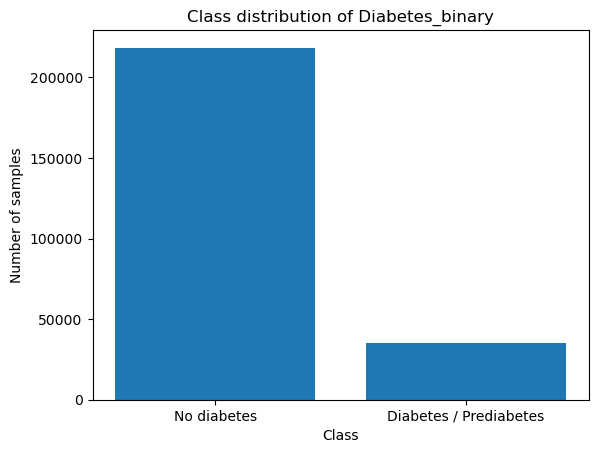

In [28]:
counts = df["Diabetes_binary"].value_counts()

plt.bar(counts.index, counts.values)
plt.xticks([0, 1], ["No diabetes", "Diabetes / Prediabetes"])
plt.xlabel("Class")
plt.ylabel("Number of samples")
plt.title("Class distribution of Diabetes_binary")
plt.show()

# just a small histogramm to show it visualy

There is a significant imbalance between individuals with diabetes and those without diabetes.

In [29]:
# séparation des variables explicatives et cibles 

X = df.drop("Diabetes_binary", axis=1)
y = df["Diabetes_binary"]

# here im just puting the dataframe w/o the classes in the variable y



In [30]:
# NEED TO BE CHANGED TO HAVE TRAIN VAL AND TEST -> SPLIT THE DATA IN 3 => DONE :))

#X_train, X_test, y_train, y_test = train_test_split(
   # X, y,
   # test_size=0.2,
    #random_state=42,
   # stratify=y   # TRÈS important avec des données déséquilibrées
#)

# stratify=y permet de garder le même déséquilibre dans train et test


# Split
#X_train_seq, X_test_seq, y_train, y_test = train_test_split(
    #X_seq, y, test_size=0.2, stratify=y, random_state=42
#)


X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, 
    test_size=0.2,           # 20% pour (val + test)
    stratify=y, 
    random_state=42
)

# 2. Split temp en val (10% du total) et test (10% du total)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,           # 50% de temp = 10% du total
    stratify=y_temp,
    random_state=42
)

# Affichage des distributions
print('=' * 60)
print('DISTRIBUTION DES CLASSES DANS CHAQUE ENSEMBLE')
print('=' * 60)
print(f'\nTotal samples: {len(y):,}')
print(f'  - Classe 0 (No Diabetes): {(y == 0).sum():,} ({(y == 0).mean():.2%})')
print(f'  - Classe 1 (Diabetes):    {(y == 1).sum():,} ({(y == 1).mean():.2%})')
print('=' * 60)

print(f'\nTRAIN SET (80% = {len(y_train):,} samples)')
print(y_train.value_counts(normalize=True).sort_index().to_frame('proportion').assign(
    count=y_train.value_counts().sort_index()
).to_string())
print('=' * 60)

print(f'\nVALIDATION SET (10% = {len(y_val):,} samples)')
print(y_val.value_counts(normalize=True).sort_index().to_frame('proportion').assign(
    count=y_val.value_counts().sort_index()
).to_string())
print('=' * 60)

print(f'\nTEST SET (10% = {len(y_test):,} samples)')
print(y_test.value_counts(normalize=True).sort_index().to_frame('proportion').assign(
    count=y_test.value_counts().sort_index()
).to_string())
print('=' * 60)

# Vérification
print(f'\n✓ Vérification: {len(y_train) + len(y_val) + len(y_test)} = {len(y)} samples')



#print('<Training Set Distribution> \n', y_train.value_counts(normalize=True).sort_index().map(lambda x: f'{x:.2%}'))
#print()
#print('<Test Set Distribution> \n', y_test.value_counts(normalize=True).sort_index().map(lambda x: f'{x:.2%}'))

DISTRIBUTION DES CLASSES DANS CHAQUE ENSEMBLE

Total samples: 253,680
  - Classe 0 (No Diabetes): 218,334 (86.07%)
  - Classe 1 (Diabetes):    35,346 (13.93%)

TRAIN SET (80% = 202,944 samples)
                 proportion   count
Diabetes_binary                    
0.0                0.860666  174667
1.0                0.139334   28277

VALIDATION SET (10% = 25,368 samples)
                 proportion  count
Diabetes_binary                   
0.0                0.860651  21833
1.0                0.139349   3535

TEST SET (10% = 25,368 samples)
                 proportion  count
Diabetes_binary                   
0.0                0.860691  21834
1.0                0.139309   3534

✓ Vérification: 253680 = 253680 samples


## ~ PARTIE 1: Comparaison des modèles supervisés classiques (sans pondération)

___________

In [31]:
def plot_confusion_matrix(model, X_test, y_test, set_name="Test"):
    """Affiche la matrice de confusion"""
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    fig, ax = plt.subplots(figsize=(8, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Diabetes', 'Diabetes'])
    disp.plot(ax=ax, cmap='Blues', values_format='d')
    plt.title(f'Confusion Matrix - {set_name} Set\n{model.__class__.__name__}')
    plt.tight_layout()
    plt.show()
    
    return cm

In [33]:
def evaluate_model(model, X_test, y_test, set_name="Test", show_cm=True):
    """
    Évalue un modèle DÉJÀ ENTRAÎNÉ sur un ensemble de données
    
    Args:
        model: modèle déjà fit()
        X_test: features de l'ensemble à évaluer
        y_test: labels de l'ensemble à évaluer
        set_name: nom de l'ensemble (pour l'affichage)
    """
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    
    print(f"\n{'='*60}")
    print(f" ÉVALUATION SUR {set_name.upper()}")
    print(f"{'='*60}")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-Score:  {f1:.4f}")
    print(f"ROC-AUC:   {roc_auc:.4f}")
    print(f"\n{classification_report(y_test, y_pred)}")

    if show_cm:
        plot_confusion_matrix(model, X_test, y_test, set_name)
    
    return {
        'accuracy': acc,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc
    }

In [37]:
#def train_and_evaluate_model(model, X_train, X_val, X_test, y_train, y_val, y_test): # ON VA RE-UTILISER CETTE FONCTION POUR LES DONNER EN TEST APRES SELECTION DES MEILLEURES MODÈLE
def train_and_evaluate_model(model, X_train, X_val, y_train, y_val):
    """
    Entraîne un modèle et l'évalue sur validation et test
    """
    # Entraînement
    print(f"\nEntraînement du modèle {model.__class__.__name__}...")
    model.fit(X_train, y_train)
    
    # Éval sur TRAIN (pour détecter l'overfitting)
   #print(f"\n{'='*60}")
    #print("PERFORMANCE SUR TRAIN SET")
   # print(f"{'='*60}")
    train_metrics = evaluate_model(model, X_train, y_train, set_name="Train")
    
    # Éval sur VALIDATION
    #print(f"\n{'='*60}")
    #print("PERFORMANCE SUR VALIDATION SET")
    #print(f"{'='*60}")
    val_metrics = evaluate_model(model, X_val, y_val, set_name="Validation")
    
    # Éval sur TEST (UNIQUEMENT à la fin !)

   # print(f"\n{'='*60}")
    #print("PERFORMANCE SUR TEST SET (FINAL)")
   # print(f"{'='*60}")
    #test_metrics = evaluate_model(model, X_test, y_test, set_name="Test")
    
    # Détection d'overfitting
    train_val_gap = train_metrics['f1'] - val_metrics['f1']
    if train_val_gap > 0.05:
        print(f"\n  OVERFITTING détecté ! Gap Train-Val: {train_val_gap:.4f}")
    else:
        print(f"\n Pas d'overfitting significatif (Gap: {train_val_gap:.4f})")
    
    return {
        'model': model,
        'train_metrics': train_metrics,
        'val_metrics': val_metrics,
        #'test_metrics': test_metrics
    }


Entraînement du modèle LogisticRegression...

 ÉVALUATION SUR TRAIN
Accuracy:  0.8638
Precision: 0.5386
Recall:    0.1580
F1-Score:  0.2443
ROC-AUC:   0.8229

              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93    174667
         1.0       0.54      0.16      0.24     28277

    accuracy                           0.86    202944
   macro avg       0.71      0.57      0.58    202944
weighted avg       0.83      0.86      0.83    202944



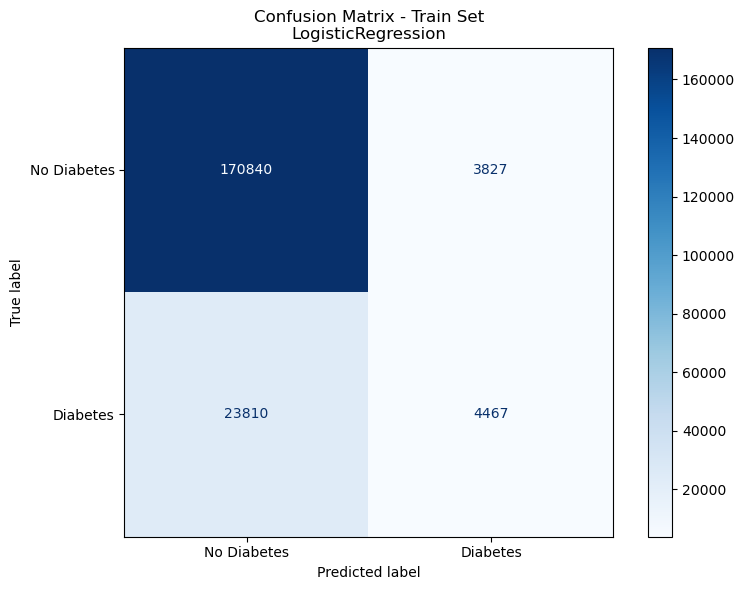


 ÉVALUATION SUR VALIDATION
Accuracy:  0.8621
Precision: 0.5163
Recall:    0.1615
F1-Score:  0.2461
ROC-AUC:   0.8231

              precision    recall  f1-score   support

         0.0       0.88      0.98      0.92     21833
         1.0       0.52      0.16      0.25      3535

    accuracy                           0.86     25368
   macro avg       0.70      0.57      0.59     25368
weighted avg       0.83      0.86      0.83     25368



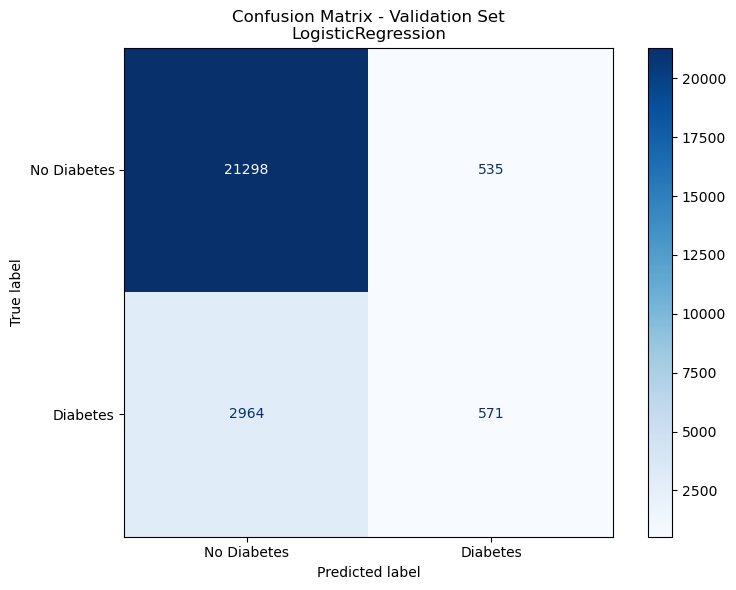


 Pas d'overfitting significatif (Gap: -0.0018)


In [38]:

results = {}
# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
results['LR'] = train_and_evaluate_model(
    #lr_model, X_train, X_val, X_test, y_train, y_val, y_test
    lr_model, X_train, X_val, y_train, y_val
)


In [27]:
# ÉTAPE 2 : Comparaison sur VALIDATION (pas test !)
print("\n" + "="*60)
print("🏆 COMPARAISON DES MODÈLES (VALIDATION SET)")
print("="*60)
for name, res in results.items():
    val_f1 = res['val_metrics']['f1']
    val_recall = res['val_metrics']['recall']
    val_roc = res['val_metrics']['roc_auc']
    print(f"{name:20} | F1: {val_f1:.4f} | Recall: {val_recall:.4f} | ROC-AUC: {val_roc:.4f}")

# ÉTAPE 3 : Sélection du meilleur modèle
best_model_name = max(results, key=lambda x: results[x]['val_metrics']['recall'])
print(f"\n✅ Meilleur modèle: {best_model_name}")

# ÉTAPE 4 : Performance finale sur TEST
print("\n" + "="*60)
print("📈 PERFORMANCE FINALE SUR TEST SET")
print("="*60)
test_metrics = results[best_model_name]['test_metrics']
print(f"F1-Score:  {test_metrics['f1']:.4f}")
print(f"Recall:    {test_metrics['recall']:.4f}")
print(f"ROC-AUC:   {test_metrics['roc_auc']:.4f}")


🏆 COMPARAISON DES MODÈLES (VALIDATION SET)
LR                   | F1: 0.2443 | Recall: 0.1601 | ROC-AUC: 0.8231

✅ Meilleur modèle: LR

📈 PERFORMANCE FINALE SUR TEST SET
F1-Score:  0.2395
Recall:    0.1556
ROC-AUC:   0.8152



Decision Tree

Entraînement du modèle DecisionTreeClassifier...

 ÉVALUATION SUR TRAIN
Accuracy:  0.9945
Precision: 0.9990
Recall:    0.9612
F1-Score:  0.9797
ROC-AUC:   0.9998

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00    174667
         1.0       1.00      0.96      0.98     28277

    accuracy                           0.99    202944
   macro avg       1.00      0.98      0.99    202944
weighted avg       0.99      0.99      0.99    202944



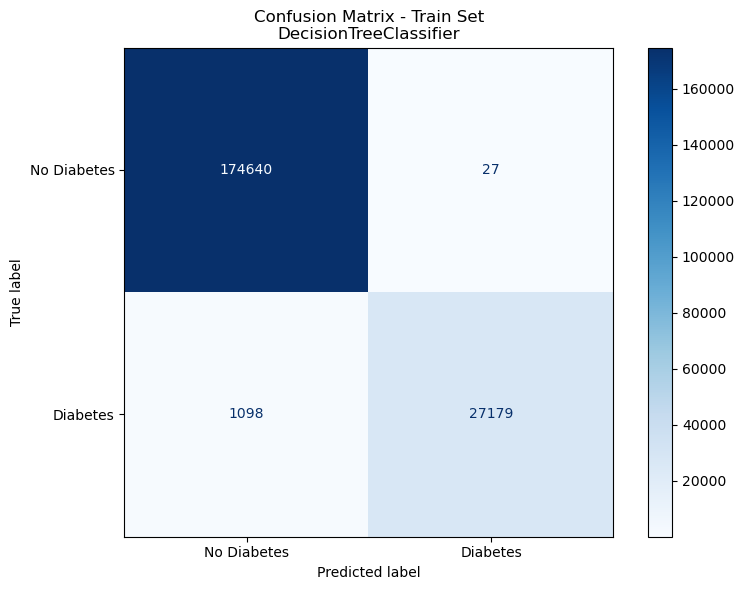


 ÉVALUATION SUR VALIDATION
Accuracy:  0.7971
Precision: 0.2928
Recall:    0.3225
F1-Score:  0.3069
ROC-AUC:   0.5967

              precision    recall  f1-score   support

         0.0       0.89      0.87      0.88     21833
         1.0       0.29      0.32      0.31      3535

    accuracy                           0.80     25368
   macro avg       0.59      0.60      0.59     25368
weighted avg       0.81      0.80      0.80     25368



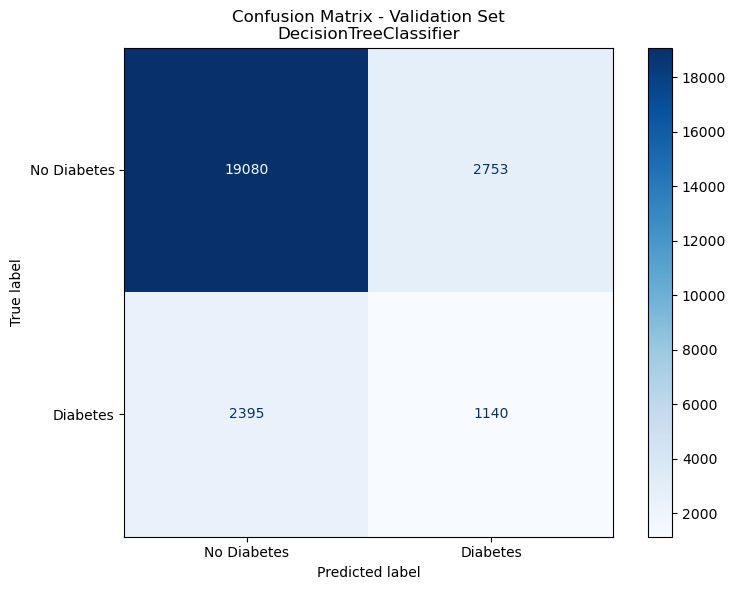


  OVERFITTING détecté ! Gap Train-Val: 0.6728


In [ ]:
# NVX CODE CLAUDE

print("\n" + "="*50)
print("Decision Tree")
print("="*50)

results = {}
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
results['DT'] = train_and_evaluate_model(
    #dt_model, X_train, X_val, X_test, y_train, y_val, y_test
    dt_model, X_train, X_val, y_train, y_val
    
)




Random Forrest

Entraînement du modèle RandomForestClassifier...

 ÉVALUATION SUR TRAIN
Accuracy:  0.9944
Precision: 0.9952
Recall:    0.9647
F1-Score:  0.9797
ROC-AUC:   0.9994

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00    174667
         1.0       1.00      0.96      0.98     28277

    accuracy                           0.99    202944
   macro avg       0.99      0.98      0.99    202944
weighted avg       0.99      0.99      0.99    202944



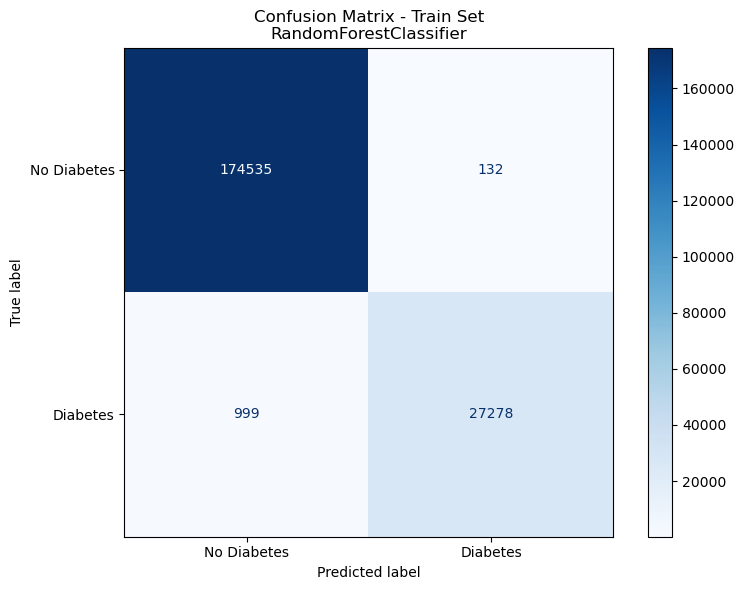


 ÉVALUATION SUR VALIDATION
Accuracy:  0.8608
Precision: 0.5015
Recall:    0.1847
F1-Score:  0.2700
ROC-AUC:   0.7985

              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92     21833
         1.0       0.50      0.18      0.27      3535

    accuracy                           0.86     25368
   macro avg       0.69      0.58      0.60     25368
weighted avg       0.83      0.86      0.83     25368



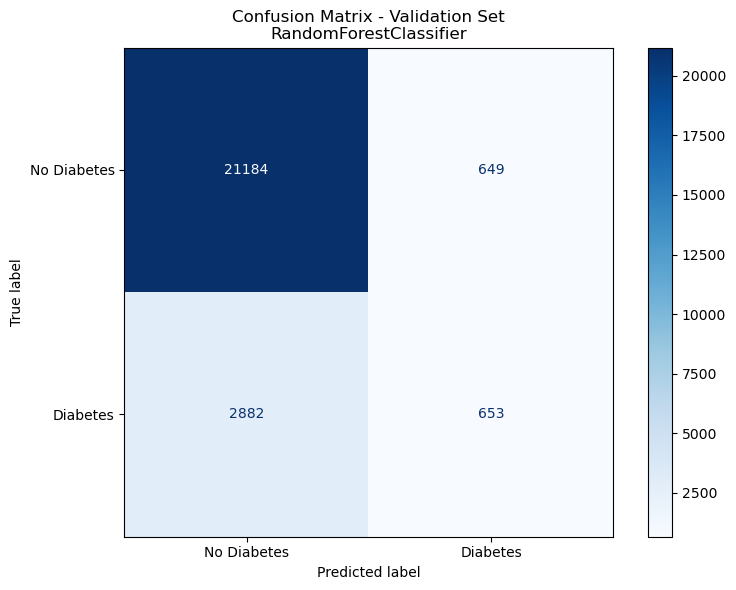


  OVERFITTING détecté ! Gap Train-Val: 0.7097


In [40]:
# NVX CODE CLAUDE

print("\n" + "="*50)
print("Random Forrest")
print("="*50)

results = {}
# random forrest
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
results['RF'] = train_and_evaluate_model(
    #rf_model, X_train, X_val, X_test, y_train, y_val, y_test
    rf_model, X_train, X_val, y_train, y_val

)


Linear SVC

Entraînement du modèle CalibratedClassifierCV...

 ÉVALUATION SUR TRAIN
Accuracy:  0.8637
Precision: 0.5356
Recall:    0.1636
F1-Score:  0.2506
ROC-AUC:   0.8233

              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93    174667
         1.0       0.54      0.16      0.25     28277

    accuracy                           0.86    202944
   macro avg       0.71      0.57      0.59    202944
weighted avg       0.83      0.86      0.83    202944



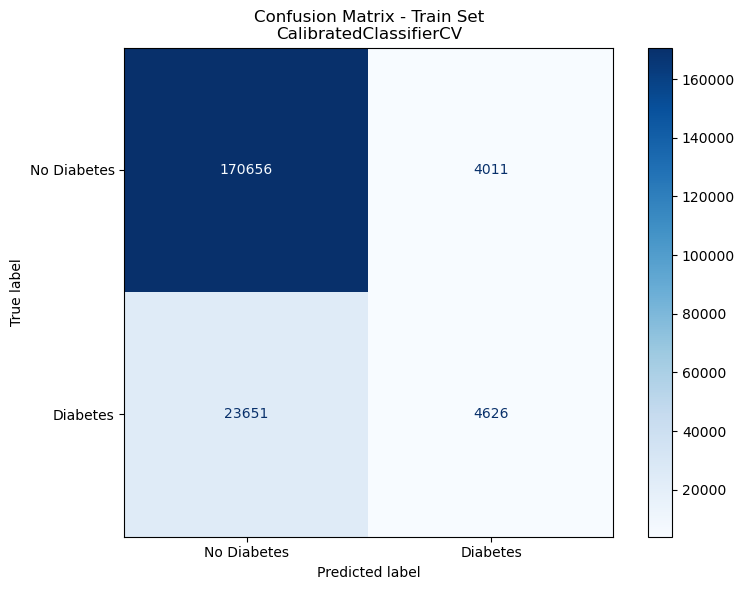


 ÉVALUATION SUR VALIDATION
Accuracy:  0.8620
Precision: 0.5153
Recall:    0.1672
F1-Score:  0.2525
ROC-AUC:   0.8227

              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92     21833
         1.0       0.52      0.17      0.25      3535

    accuracy                           0.86     25368
   macro avg       0.70      0.57      0.59     25368
weighted avg       0.83      0.86      0.83     25368



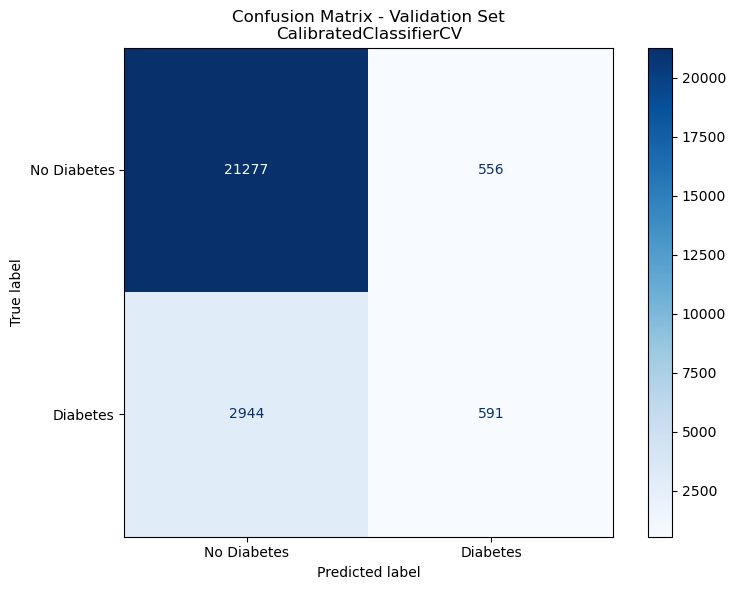


 Pas d'overfitting significatif (Gap: -0.0018)


In [41]:
# NVX CODE CLAUDE

print("\n" + "="*50)
print("Linear SVC")
print("="*50)

results = {}
# Linear SVC
svc_model = CalibratedClassifierCV(LinearSVC(random_state=42, max_iter=5000))  # Wrapper pour predict_proba
results['SVC'] = train_and_evaluate_model(
    #svc_model, X_train, X_val, X_test, y_train, y_val, y_test
    svc_model, X_train, X_val, y_train, y_val
    
    )


Gradient Boosting

Entraînement du modèle GradientBoostingClassifier...

 ÉVALUATION SUR TRAIN
Accuracy:  0.8673
Precision: 0.5792
Recall:    0.1753
F1-Score:  0.2691
ROC-AUC:   0.8324

              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93    174667
         1.0       0.58      0.18      0.27     28277

    accuracy                           0.87    202944
   macro avg       0.73      0.58      0.60    202944
weighted avg       0.84      0.87      0.84    202944



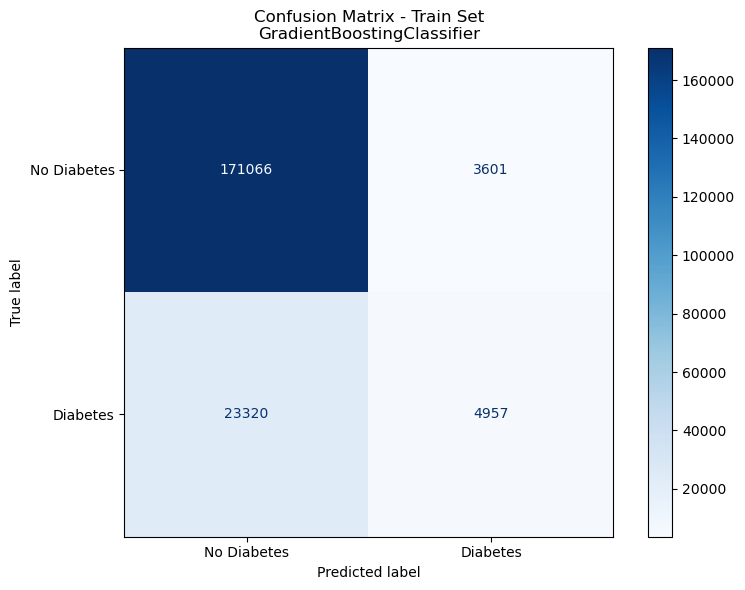


 ÉVALUATION SUR VALIDATION
Accuracy:  0.8653
Precision: 0.5536
Recall:    0.1723
F1-Score:  0.2628
ROC-AUC:   0.8314

              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     21833
         1.0       0.55      0.17      0.26      3535

    accuracy                           0.87     25368
   macro avg       0.72      0.57      0.59     25368
weighted avg       0.83      0.87      0.83     25368



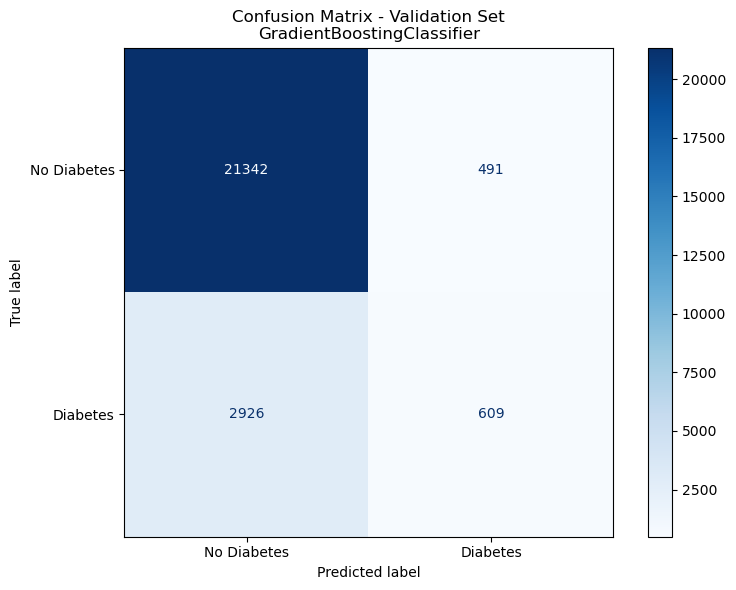


 Pas d'overfitting significatif (Gap: 0.0064)


In [42]:
# NVX CODE CLAUDE

print("\n" + "="*50)
print("Gradient Boosting")
print("="*50)

results = {}
# Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42, n_estimators=100)
results['GB'] = train_and_evaluate_model(
    #gb_model, X_train, X_val, X_test, y_train, y_val, y_test
    gb_model, X_train, X_val, y_train, y_val
    
    )


AdaBoost

Entraînement du modèle AdaBoostClassifier...

 ÉVALUATION SUR TRAIN
Accuracy:  0.8648
Precision: 0.5409
Recall:    0.1963
F1-Score:  0.2881
ROC-AUC:   0.8257

              precision    recall  f1-score   support

         0.0       0.88      0.97      0.93    174667
         1.0       0.54      0.20      0.29     28277

    accuracy                           0.86    202944
   macro avg       0.71      0.58      0.61    202944
weighted avg       0.83      0.86      0.84    202944



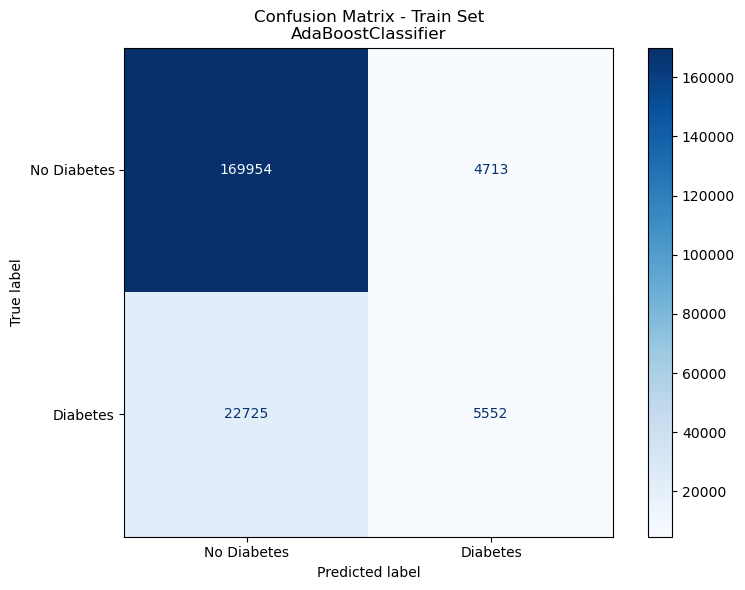


 ÉVALUATION SUR VALIDATION
Accuracy:  0.8636
Precision: 0.5279
Recall:    0.1980
F1-Score:  0.2880
ROC-AUC:   0.8258

              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92     21833
         1.0       0.53      0.20      0.29      3535

    accuracy                           0.86     25368
   macro avg       0.70      0.58      0.61     25368
weighted avg       0.83      0.86      0.84     25368



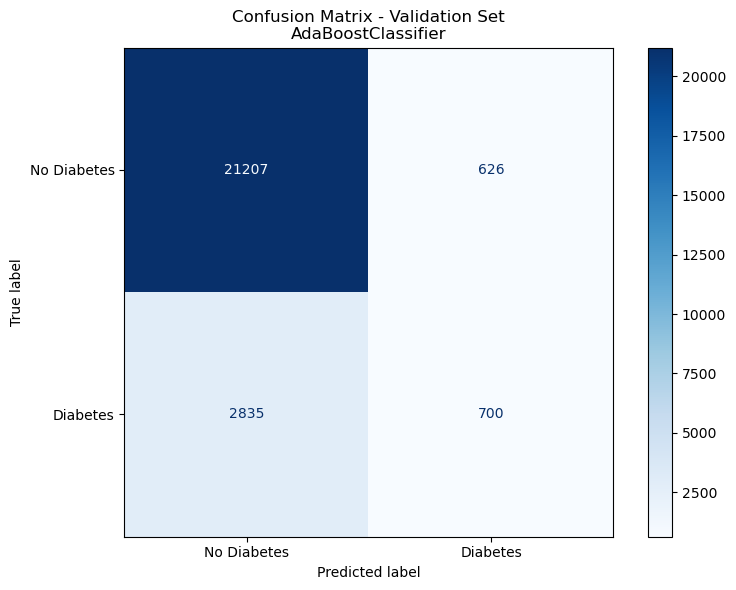


 Pas d'overfitting significatif (Gap: 0.0001)


In [43]:
# NVX CODE CLAUDE

print("\n" + "="*50)
print("AdaBoost")
print("="*50)

results = {}
# ada boost
ab_model = AdaBoostClassifier(random_state=42, n_estimators=100)
results['AB'] = train_and_evaluate_model(
    #ab_model, X_train, X_val, X_test, y_train, y_val, y_test
    ab_model, X_train, X_val, y_train, y_val
    
    )


XGBoost

Entraînement du modèle XGBClassifier...

 ÉVALUATION SUR TRAIN
Accuracy:  0.8765
Precision: 0.6810
Recall:    0.2140
F1-Score:  0.3256
ROC-AUC:   0.8569

              precision    recall  f1-score   support

         0.0       0.89      0.98      0.93    174667
         1.0       0.68      0.21      0.33     28277

    accuracy                           0.88    202944
   macro avg       0.78      0.60      0.63    202944
weighted avg       0.86      0.88      0.85    202944



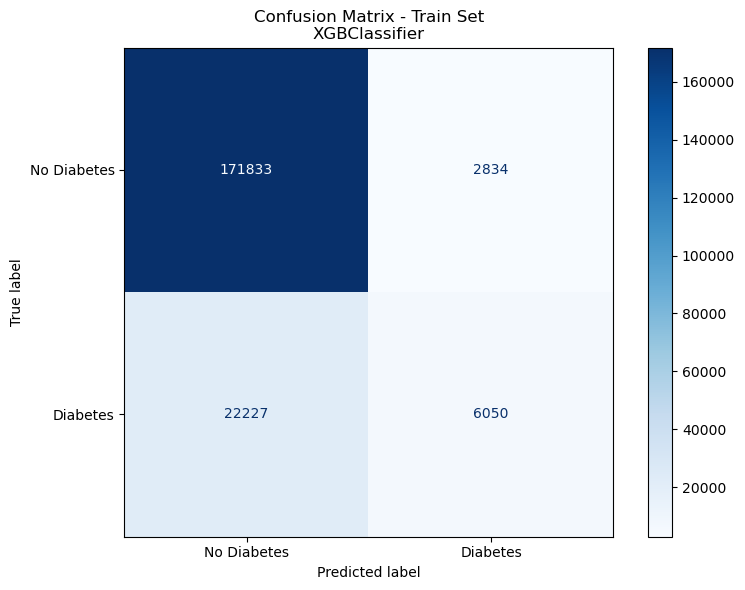


 ÉVALUATION SUR VALIDATION
Accuracy:  0.8630
Precision: 0.5263
Recall:    0.1672
F1-Score:  0.2538
ROC-AUC:   0.8286

              precision    recall  f1-score   support

         0.0       0.88      0.98      0.92     21833
         1.0       0.53      0.17      0.25      3535

    accuracy                           0.86     25368
   macro avg       0.70      0.57      0.59     25368
weighted avg       0.83      0.86      0.83     25368



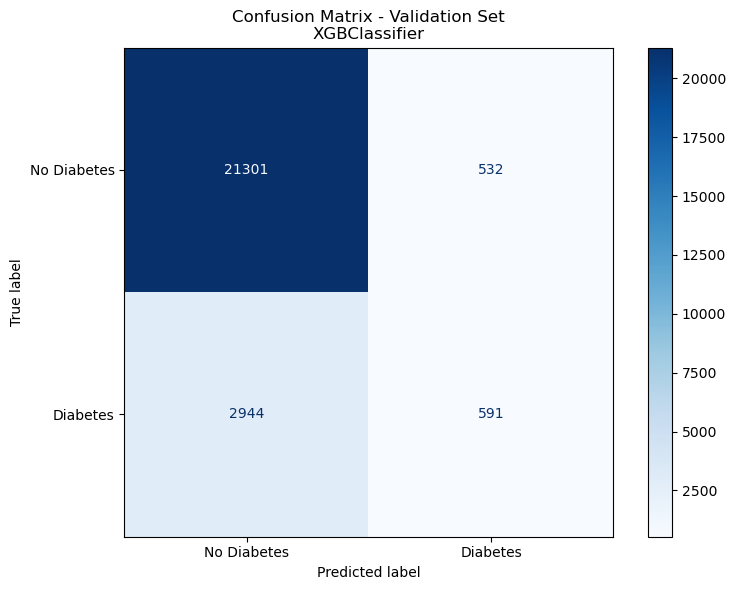


  OVERFITTING détecté ! Gap Train-Val: 0.0719


In [44]:
# NVX CODE CLAUDE

print("\n" + "="*50)
print("XGBoost")
print("="*50)

results = {}
# XGBoost
xgb_model =  XGBClassifier(random_state=42, n_estimators=100, eval_metric='logloss')
results['XGB'] = train_and_evaluate_model(
    #xgb_model, X_train, X_val, X_test, y_train, y_val, y_test
    xgb_model, X_train, X_val, y_train, y_val
    
    )

### Tableau récapitulatif des résultats – Évaluation sur l’ensemble de validation

| Modèle                   | Accuracy   | Precision (classe 1) | Recall (classe 1) | F1-score (classe 1) | ROC-AUC    |
| ------------------------ | ---------- | -------------------- | ----------------- | ------------------- | ---------- |
| Logistic Regression (LR) | 0.8620     | 0.5150               | 0.1601            | 0.2443              | 0.8231     |
| Random Forest (RF)       | 0.8608     | 0.5015               | 0.1847            | 0.2700              | 0.7985     |
| Decision Tree (DT)       | 0.7971     | 0.2928               | 0.3225            | 0.3069              | 0.5967     |
| Linear SVC               | 0.8620     | 0.5153               | 0.1672            | 0.2525              | 0.8227     |
| Gradient Boosting        | **0.8653** | **0.5536**           | 0.1723            | 0.2628              | **0.8314** |
| AdaBoost                 | 0.8636     | 0.5279               | **0.1980**        | **0.2880**          | 0.8258     |
| XGBoost                  | 0.8630     | 0.5263               | 0.1672            | 0.2538              | 0.8286     |


Bien que la majorité des modèles obtiennent une accuracy élevée, le rappel de la classe diabétique (classe 1) reste faible, mettant en évidence l’impact du déséquilibre des classes et la nécessité de stratégies adaptées pour améliorer la détection des cas positifs.

Afin d’analyser l’impact du déséquilibre des classes, nous avons sélectionné deux modèles représentatifs : une **régression logistique**, modèle linéaire simple et interprétable servant de référence, et un **random forrest**, modèle non linéaire plus puissant. Ce choix permet d’étudier si la pondération des classes améliore la détection des individus diabétiques de manière cohérente, indépendamment de la complexité du modèle.

Nous avons choisi de ne pas sélectinné les modèles Gradient Boosting et XGBoost car même si ils sont trés performant en naïfs, ces modèles intègrent déjà une forme de focalisation sur les erreurs, rendant l’impact explicite de la pondération moins visible.


In [45]:
# SANS class_weight='balanced'
models_unbalanced = {
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Linear SVC': CalibratedClassifierCV(LinearSVC(random_state=42, max_iter=5000)),  # Wrapper pour predict_proba
    'Gradient Boosting': GradientBoostingClassifier(random_state=42, n_estimators=100),
    'AdaBoost': AdaBoostClassifier(random_state=42, n_estimators=100),
    'XGBoost': XGBClassifier(random_state=42, n_estimators=100, eval_metric='logloss'),
    #'K-NN': KNeighborsClassifier(n_neighbors=5)
}

In [24]:
print("\n" + "🔵"*30)
print("MODÈLES SANS CLASS_WEIGHT='BALANCED'")
print("🔵"*30)

results_unbalanced = {}

for name, model in models_unbalanced.items():
    print(f"\n{'#'*60}")
    print(f"### {name}")
    print(f"{'#'*60}")
    results_unbalanced[name] = train_and_evaluate_model(
        model, X_train, X_val, X_test, y_train, y_val, y_test
    )


🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵
MODÈLES SANS CLASS_WEIGHT='BALANCED'
🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵


NameError: name 'models_unbalanced' is not defined

## ~ PARTIE 2:  Pondération des classes & Analyse de l’impact du déséquilibre

Pourquoi on fait class_weight="balanced" ?
Le problème de fond de notre dataset = le déséquilibre

Dans notre dataset :

beaucoup de non diabétiques

peu de diabétiques

Un modèle naïf apprend : “Si je prédis toujours non diabétique, je suis souvent correct.”

ici, class_weight = "balanced", punit plus fortement les erreurs sur la classe minoritaire (diabétique)

Conséquence, le modèle fait plus attention aux diabétiques, le recall augmente, l’accuracy peut baisser

**CCL: La pondération des classes permet de corriger le biais induit par le déséquilibre.**


Analyse du déséquilibre (à dire avant)

Étudier l’impact du déséquilibre des classes sur les performances des modèles supervisés, en particulier sur la détection des individus diabétiques. Ici, on ne cherche pas le meilleur modèle. On fixe simplement les modèles et on change uniquement la gestion du déséquilibre.


-----------------

In [ ]:
#class_weight="balanced"
# "When class_weights=’balanced’, the model automatically assigns the class weights inversely proportional to their respective frequencies."
# https://tracyrenee61.medium.com/how-i-used-class-weights-balanced-to-solve-a-class-imbalance-problem-in-python-cceaecd4c659

In [47]:
def train_and_evaluate_model(model, X_train, X_val, X_test, y_train, y_val, y_test): # ON VA RE-UTILISER CETTE FONCTION POUR LES DONNER EN TEST APRES SELECTION DES MEILLEURES MODÈLE
#def train_and_evaluate_model(model, X_train, X_val, y_train, y_val):
    """
    Entraîne un modèle et l'évalue sur validation et test
    """
    # Entraînement
    print(f"\nEntraînement du modèle {model.__class__.__name__}...")
    model.fit(X_train, y_train)
    
    # Éval sur TRAIN (pour détecter l'overfitting)
   #print(f"\n{'='*60}")
    #print("PERFORMANCE SUR TRAIN SET")
   # print(f"{'='*60}")
    train_metrics = evaluate_model(model, X_train, y_train, set_name="Train")
    
    # Éval sur VALIDATION
    #print(f"\n{'='*60}")
    #print("PERFORMANCE SUR VALIDATION SET")
    #print(f"{'='*60}")
    val_metrics = evaluate_model(model, X_val, y_val, set_name="Validation")
    
    # Éval sur TEST (UNIQUEMENT à la fin !)

   # print(f"\n{'='*60}")
    #print("PERFORMANCE SUR TEST SET (FINAL)")
   # print(f"{'='*60}")
    test_metrics = evaluate_model(model, X_test, y_test, set_name="Test")
    
    # Détection d'overfitting
    train_val_gap = train_metrics['f1'] - val_metrics['f1']
    if train_val_gap > 0.05:
        print(f"\n  OVERFITTING détecté ! Gap Train-Val: {train_val_gap:.4f}")
    else:
        print(f"\n Pas d'overfitting significatif (Gap: {train_val_gap:.4f})")
    
    return {
        'model': model,
        'train_metrics': train_metrics,
        'val_metrics': val_metrics,
        'test_metrics': test_metrics
    }


 Logistic Regression - Balanced

Entraînement du modèle LogisticRegression...

 ÉVALUATION SUR TRAIN
Accuracy:  0.7320
Precision: 0.3120
Recall:    0.7659
F1-Score:  0.4433
ROC-AUC:   0.8235

              precision    recall  f1-score   support

         0.0       0.95      0.73      0.82    174667
         1.0       0.31      0.77      0.44     28277

    accuracy                           0.73    202944
   macro avg       0.63      0.75      0.63    202944
weighted avg       0.86      0.73      0.77    202944



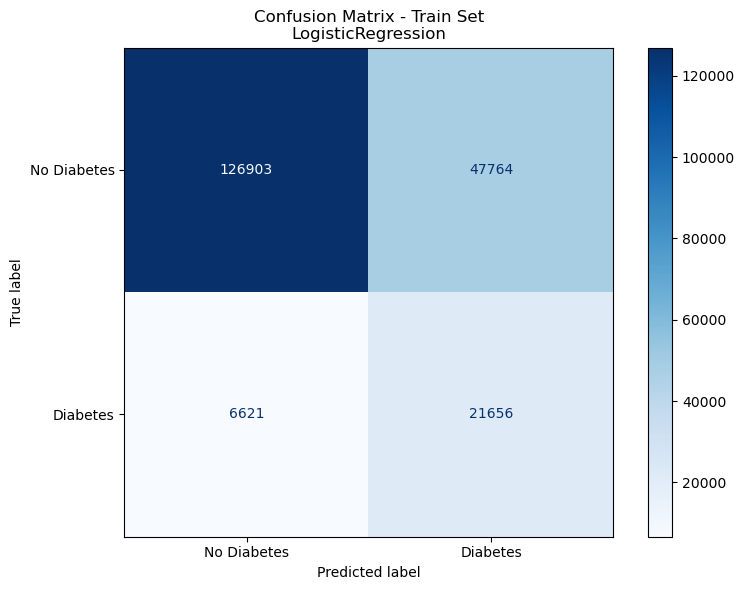


 ÉVALUATION SUR VALIDATION
Accuracy:  0.7345
Precision: 0.3151
Recall:    0.7714
F1-Score:  0.4475
ROC-AUC:   0.8237

              precision    recall  f1-score   support

         0.0       0.95      0.73      0.83     21833
         1.0       0.32      0.77      0.45      3535

    accuracy                           0.73     25368
   macro avg       0.63      0.75      0.64     25368
weighted avg       0.86      0.73      0.77     25368



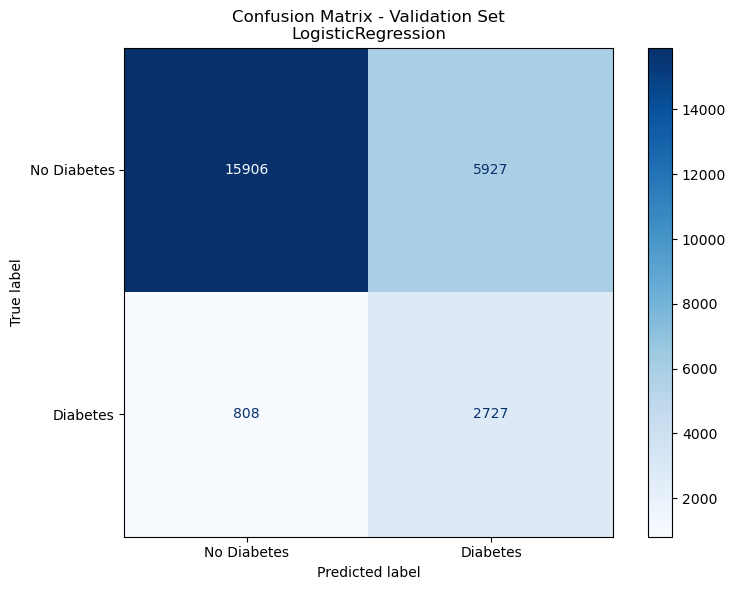


 ÉVALUATION SUR TEST
Accuracy:  0.7286
Precision: 0.3064
Recall:    0.7507
F1-Score:  0.4352
ROC-AUC:   0.8155

              precision    recall  f1-score   support

         0.0       0.95      0.72      0.82     21834
         1.0       0.31      0.75      0.44      3534

    accuracy                           0.73     25368
   macro avg       0.63      0.74      0.63     25368
weighted avg       0.86      0.73      0.77     25368



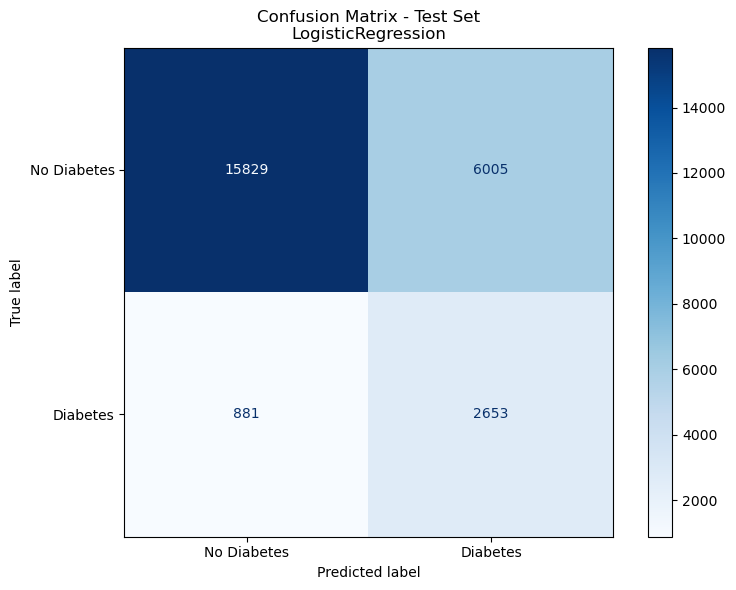


 Pas d'overfitting significatif (Gap: -0.0041)


In [48]:
# NVX CODE CLAUDE

print("\n" + "="*50)
print(" Logistic Regression - Balanced")
print("="*50)

results = {}
# Logistic Regression - Balenced
lr_model_balanced = lr_model = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)
results['LR_Balanced'] = train_and_evaluate_model(
    lr_model_balanced, X_train, X_val, X_test, y_train, y_val, y_test
    #lr_model, X_train, X_val, y_train, y_val
)




Random Forrest - Balanced

Entraînement du modèle RandomForestClassifier...

 ÉVALUATION SUR TRAIN
Accuracy:  0.9934
Precision: 0.9624
Recall:    0.9914
F1-Score:  0.9767
ROC-AUC:   0.9993

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00    174667
         1.0       0.96      0.99      0.98     28277

    accuracy                           0.99    202944
   macro avg       0.98      0.99      0.99    202944
weighted avg       0.99      0.99      0.99    202944



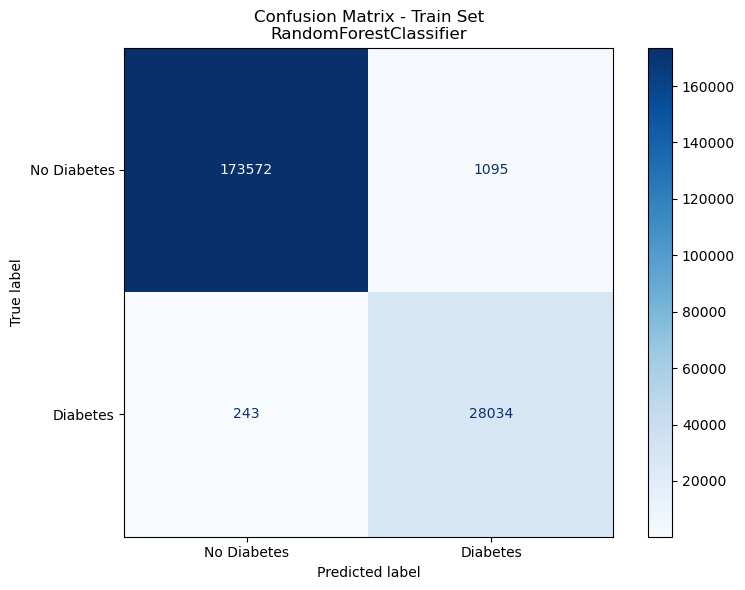


 ÉVALUATION SUR VALIDATION
Accuracy:  0.8586
Precision: 0.4793
Recall:    0.1669
F1-Score:  0.2476
ROC-AUC:   0.7942

              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92     21833
         1.0       0.48      0.17      0.25      3535

    accuracy                           0.86     25368
   macro avg       0.68      0.57      0.58     25368
weighted avg       0.82      0.86      0.83     25368



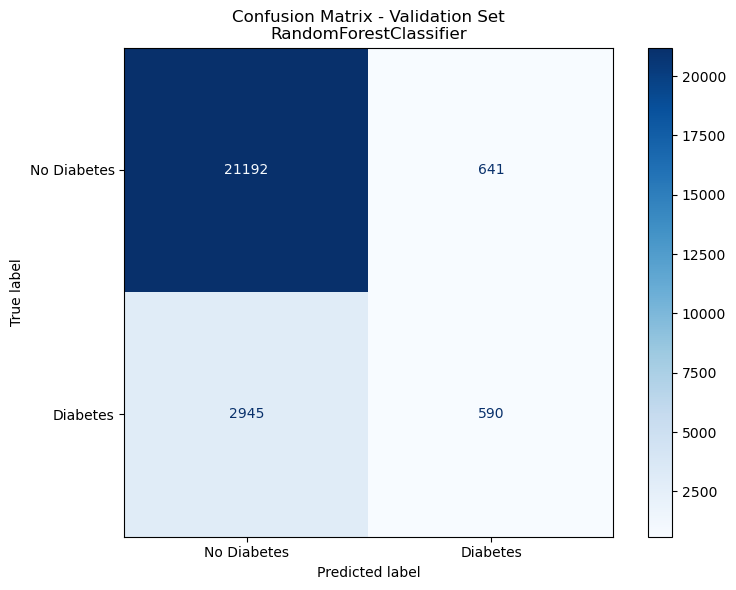


 ÉVALUATION SUR TEST
Accuracy:  0.8554
Precision: 0.4447
Recall:    0.1525
F1-Score:  0.2271
ROC-AUC:   0.7885

              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92     21834
         1.0       0.44      0.15      0.23      3534

    accuracy                           0.86     25368
   macro avg       0.66      0.56      0.57     25368
weighted avg       0.82      0.86      0.82     25368



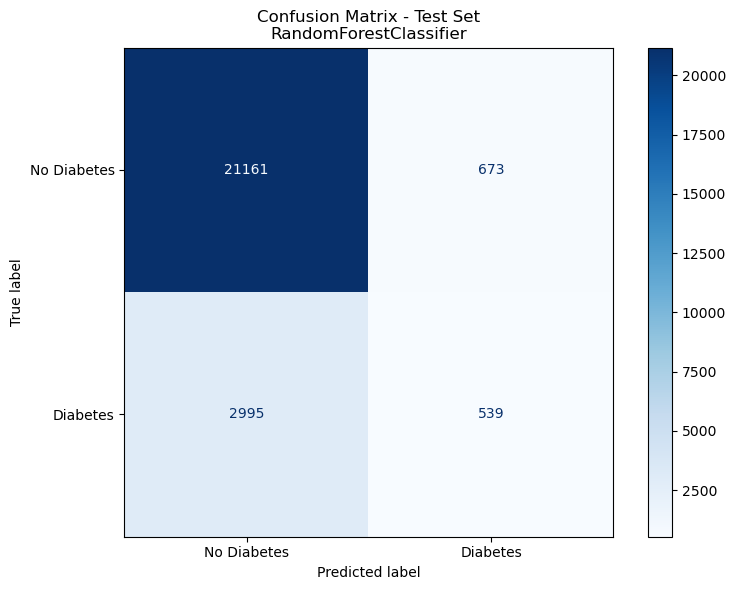


  OVERFITTING détecté ! Gap Train-Val: 0.7291


In [50]:
# NVX CODE CLAUDE

print("\n" + "="*50)
print("Random Forrest - Balanced")
print("="*50)

results = {}
# random forrest - Balanced
rf_model_balanced = RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced')
results['RF_Balanced'] = train_and_evaluate_model(
    rf_model_balanced, X_train, X_val, X_test, y_train, y_val, y_test
    #rf_model, X_train, X_val, y_train, y_val

)

### Tableau récapitulatif — Évaluation sur VALIDATION uniquement
#### Classe positive = diabète (1)

| Modèle              | Pondération  | Accuracy   | Precision (1) | Recall (1) | F1-score (1) | ROC-AUC |
| ------------------- | ------------ | ---------- | ------------- | ---------- | ------------ | ------- |
| Logistic Regression | Unbalanced   | 0.8621     | 0.5163        | 0.1615     | 0.2461       | 0.8231  |
| Logistic Regression | **Balanced** | **0.7345** | 0.3151        | **0.7714** | **0.4475**   | 0.8237  |
| Random Forest       | Unbalanced   | 0.8608     | 0.5015        | 0.1847     | 0.2700       | 0.7985  |
| Random Forest       | Balanced     | 0.8586     | 0.4793        | 0.1669     | 0.2476       | 0.7942  |


Tout d'abords, pour les modèles de type Logistic Regression, il y a un effet clair, net et massif de la pondération.

Pour le LR non pondéré, on obtient une accuracy élevée (~0.86) et un recall pour la classe 1 (=diabète) très faible (~0.16). Ce qui nous indique que le modèle privilégie massivement la classe majoritaire. C'est le comportement typique attendue pour un modèle biaisé par le déséquilibre. 

Pour le LR pondéré (class_weight="balanced"). On a un recall plus intéresant pour la classe 1 (=diabète) : 0.16 → 0.77 (×5 !). Avec un F1-score : 0.25 → 0.45
Cependant l'Accuracy diminue (logique etant donné qu'avant l'accuracy etait influencé par la classe majoritaire). Et la ROC-AUC ≈ inchangé. Dans ce modèle la pondération ne change pas la capacité de séparation globale (ROC-AUC), mais modifie profondément le compromis précision–rappel. C’est exactement l’effet théorique que nous attendiosn, et c’est pour ça que la Linéar Règression est un modèle de démonstration parfait.

Pour les modèles de type Random Forrest, l'eefet de la pondération est beaucoup plus subtil malgré la forte capacité de ces modèles.

On observe pour le RF non pondéré un overfitting massif (train ≈ 1, validation ≈ 0.86)pour un recall de la classe diabète (= classe 1) faible (~0.18). Même si on obtient une bonne accuracy pour ce modèle, nous avons une mauvaise détection des cas positifs du diabtes. Ce qui nous permet de comprendre que même un modèle très puissant reste biaisé par le déséquilibre de classe. 

Dans le cas du RF pondéré, il y n'a aucune amélioration du Recall de la classe 1 (=diabète). On observe une légère baisse de toutes les autres métriques (en comparaison avec le modèle du RF unbalanced), un overfitting qui est toujours présent et la ROC-AUC diminue légèrement. Das ce genre de moèle la pondération des classes n’est pas toujours suffisante pour corriger le biais dans des modèles très flexibles comme le random forrest.

# A FAIRE !!!

🔹 Analyse du déséquilibre

Sans pondération, les modèles favorisent fortement la classe majoritaire, ce qui conduit à une sous-détection importante des cas diabétiques.

🔹 Effet de la pondération

La pondération des classes permet d’augmenter significativement le rappel de la classe minoritaire, au prix d’une légère baisse de l’accuracy globale.

🔹 Contexte santé

Dans un contexte de santé publique, la réduction des faux négatifs est prioritaire par rapport à la précision globale.